# Problem Statement

## BACKGROUND

Air warfare is the business of maintaining a higher situational awareness than the enemy. See: https://csbaonline.org/uploads/documents/Air-to-Air-Report-.pdf

This has been a fact since the earliest days of war in the air.

"The enemy must be surprised and attached at a disadvantage, if possible with superior numbers so the initiative was with the patrol... the combat must continue until the enmy has admitted his inferiority, by being shot down or running away."

Oswald Boelcke in the "Dicta Boelcke", a World War 1 era flight combat manual.

German aces of World War 2, such as Erich Hartmann (352 kills) and Gerd Barkhorn (302 kills) stressed what they referred to as "ambush tactics" in Europe. In the Pacific, American aces such as Richard Bong (40 kills) amd Tommy McGuire (38 kills) developed virtually identical tactics.

A detailed analysis of 112 air combat engagements during the Vietnam War conducted by the US Air Force concluded that 80% of aircrew shot down were unaware of the impending attack. 

"Despite vast changes in aircraft, sensor, communication, and weapon capabilities over the past century, the fundamental goal of air combat has remained constant: leverage superior [Situational Awareness] SA, to sneak into firing position, destroy the opposing aircraft, and depart before other enemy aircraft can react."

Trends in Airt-to-air combat - Implications for Future Air Superiority, John Stillon, CSBA report.

Modern sensors primarily focus on radar detection of hostile aircraft, with a dearth of ground-based optical sensors.

## PROBLEM:

There are several problems intended to be solved by this project:

1. In order to avoid being surprised by radar guided munitions, modern military aircraft usually come equipped with a radar warning receiver. This set of antennae and processing equipment passively "listen" for radio waves used by radar and provide the pilot with warnings on (i) the presence of a radar, (ii) when the radar is tracking the aircraft, and (iii) when the radar is guiding a missile onto aircraft. 

Radars cannot be kept on indefinitely. Imagine a dark room. Turning the radar on is the equivalent of turning on a torch in the said dark room. Anti radiation missiles can home in on the radar emissions. Certain aircraft are also specially equipped to triangulate the position of an emitting radar to provide coordinates to other precision guided munitions (see: AN/ASQ-213 HARM targeting system)

Combining radar detection with other, passive sensors, permit greater SA than radar systems alone.

2. Missiles rockets do not burn the entire time of flight. They usually only have a few seconds of fuel before the missile relies on momentum to coast to the target (exceptions such as the MBDA Meteor exist, but that is an exception). This means that missiles can be kinematically defeated by simply turning in the other direction. The further away the target is when launch occurs, the more reaction time the pilot has.

A passive sensor would permit the radars to remain off until the target enters the no escape zone (where the missile will still catch the target if it turns and runs and there is accordingly a high Pk (kill probability)).

3. No sensor net is perfect, additional passive sensors that can be acquired cheaply (cameras and consumer GPUs) offers a capability boost with a small expenditure of resources. 

## OBJECTIVES:

1. Build a model which detects military aircraft from an image.

2. Build a second model to identify the type of aircraft detected by the first model.

3. Integrate both models into a program which take in (i) coordinates of camera, (ii) elevation of camera, (iii) altitude of camera, and (iv) information from the models, and return (i) type of aircraft, (ii) estimated coordinates of aircraft, and (iii) estimated altitude of aircraft.

## SCOPE:

1. Use the data to feed various machine learning models to achieve the objectives.

2. Select the best detection model based on precision/recall, and the best classification model based on accuracy. 

3. Develop program to satisfy the requirements of objective 3.

## DATA:

1. Military aircraft detection dataset. https://www.kaggle.com/datasets/a2015003713/militaryaircraftdetectiondataset

## METHODS AND TOOLS:

1. Neural networks including (i) ConvNext, (ii) EfficientNet, (iii) YOLOv8, (iv) RT-DETR.

## SUCCESS METRICS:

1. Accuracy.

2. Precision/Recall.

# Data

## The following grids were derived from exploration carried out during data preparation for modelling

### Images used for training detection model

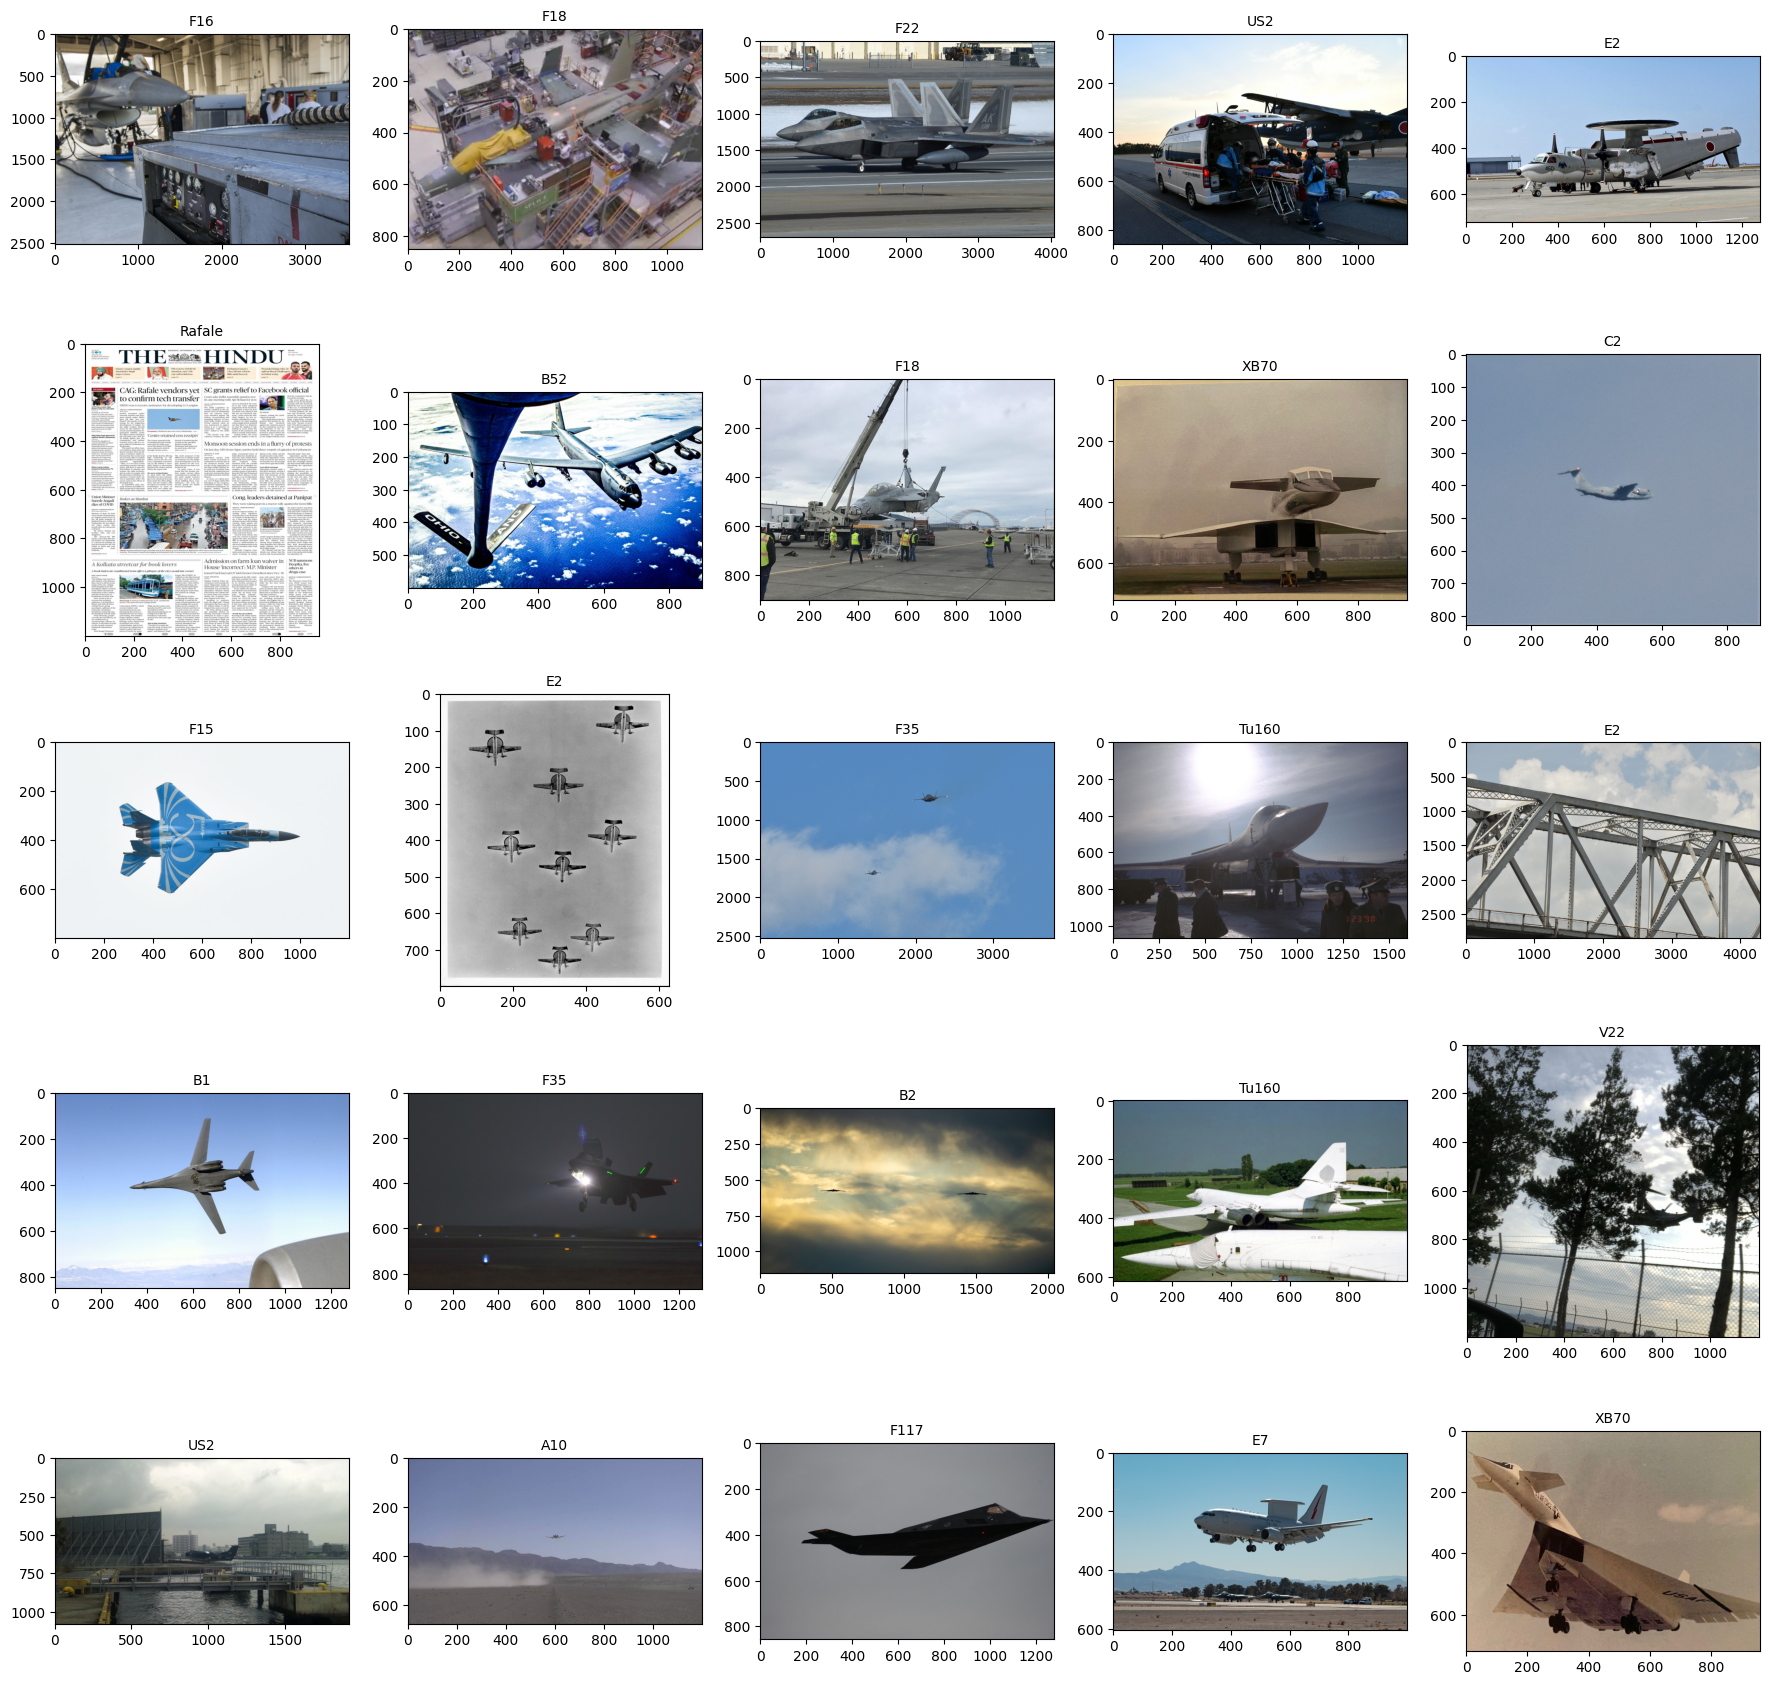

### Cropped Aircraft Images - used for training classification model

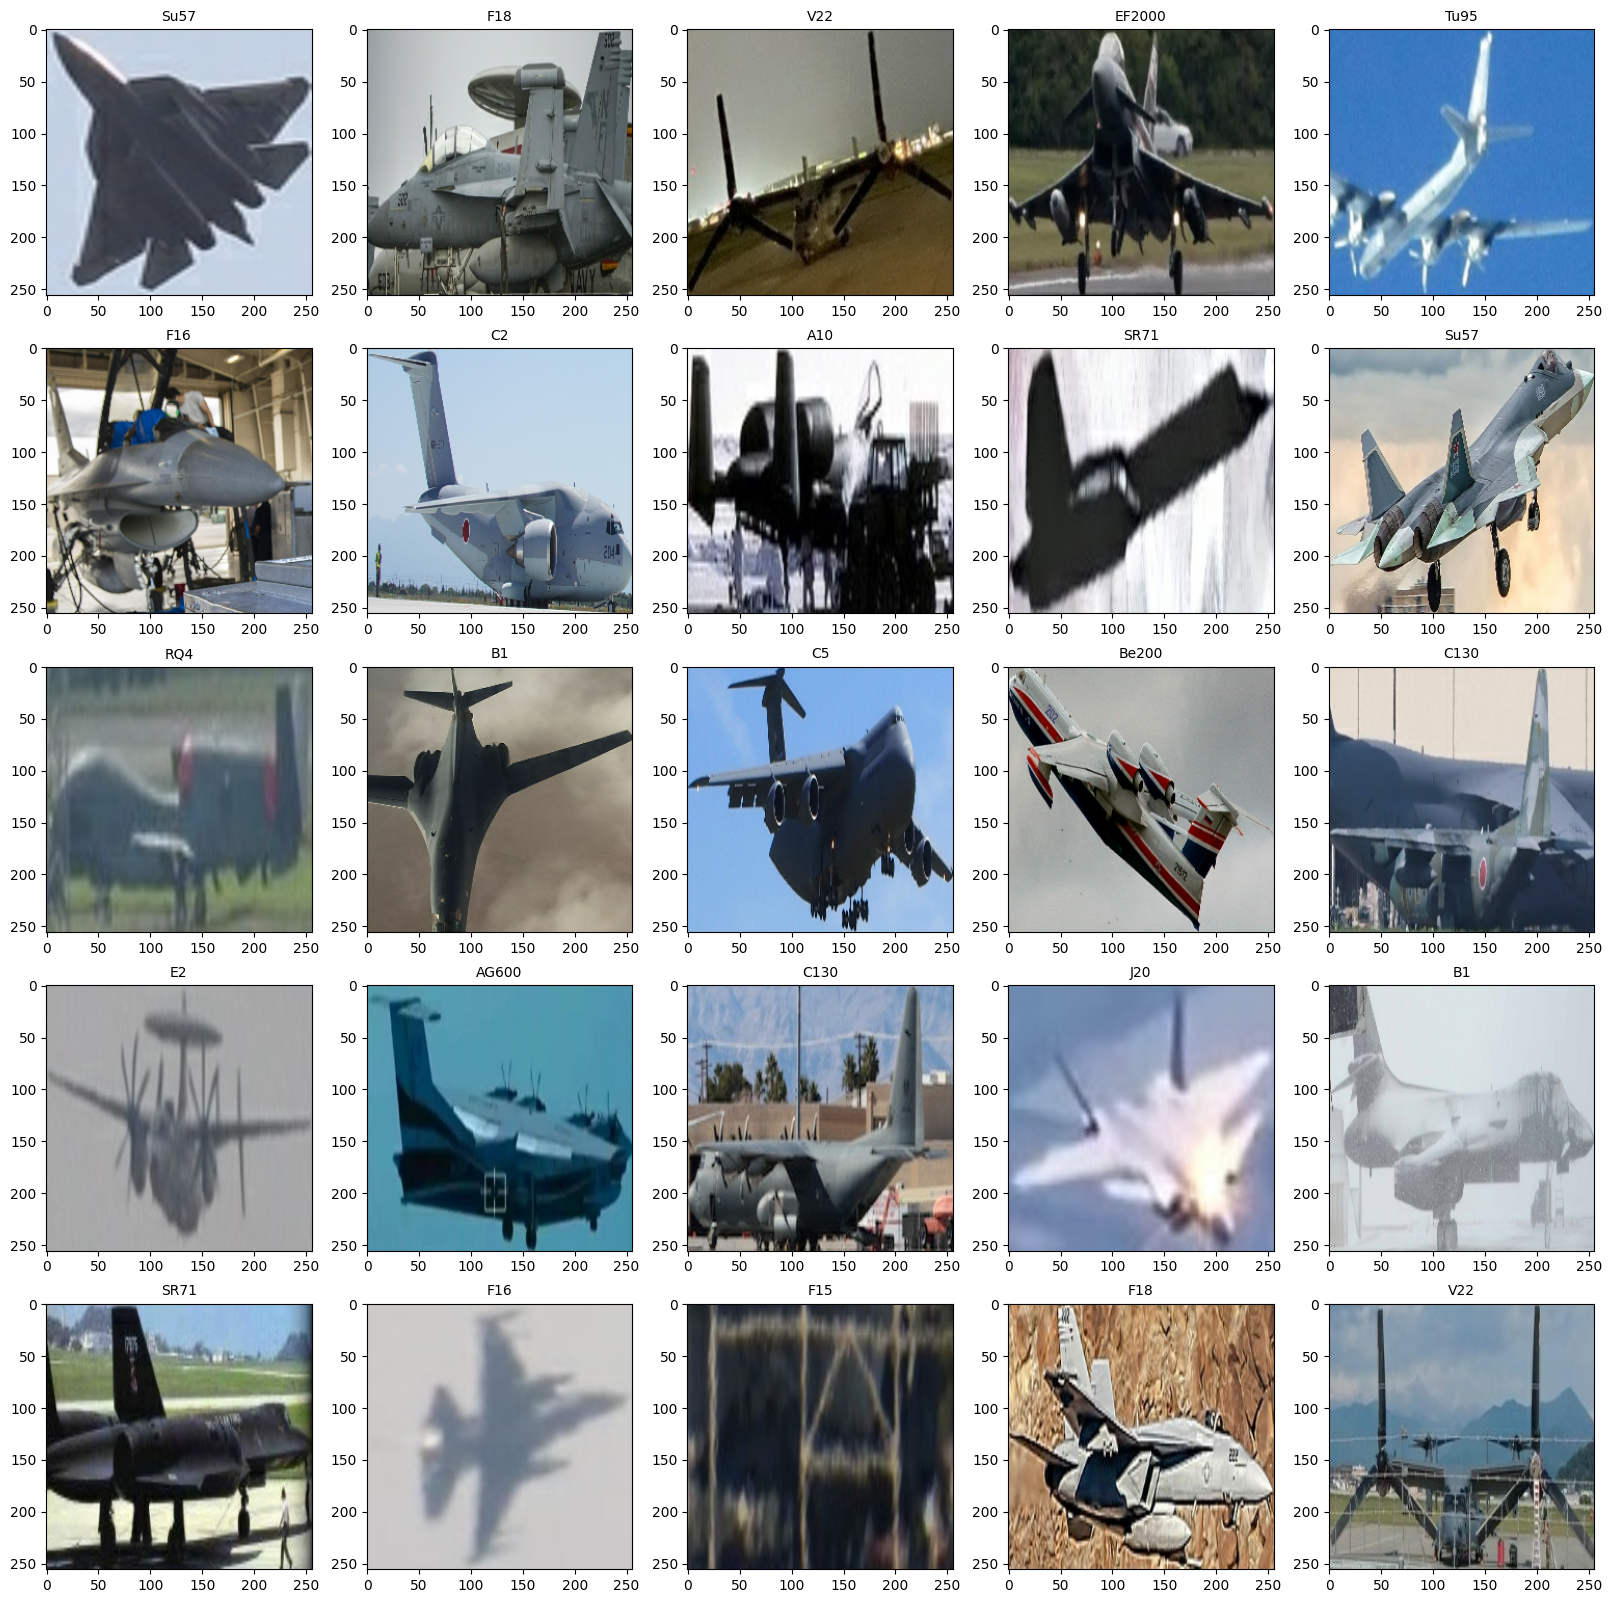

### Number of images per aircraft type 

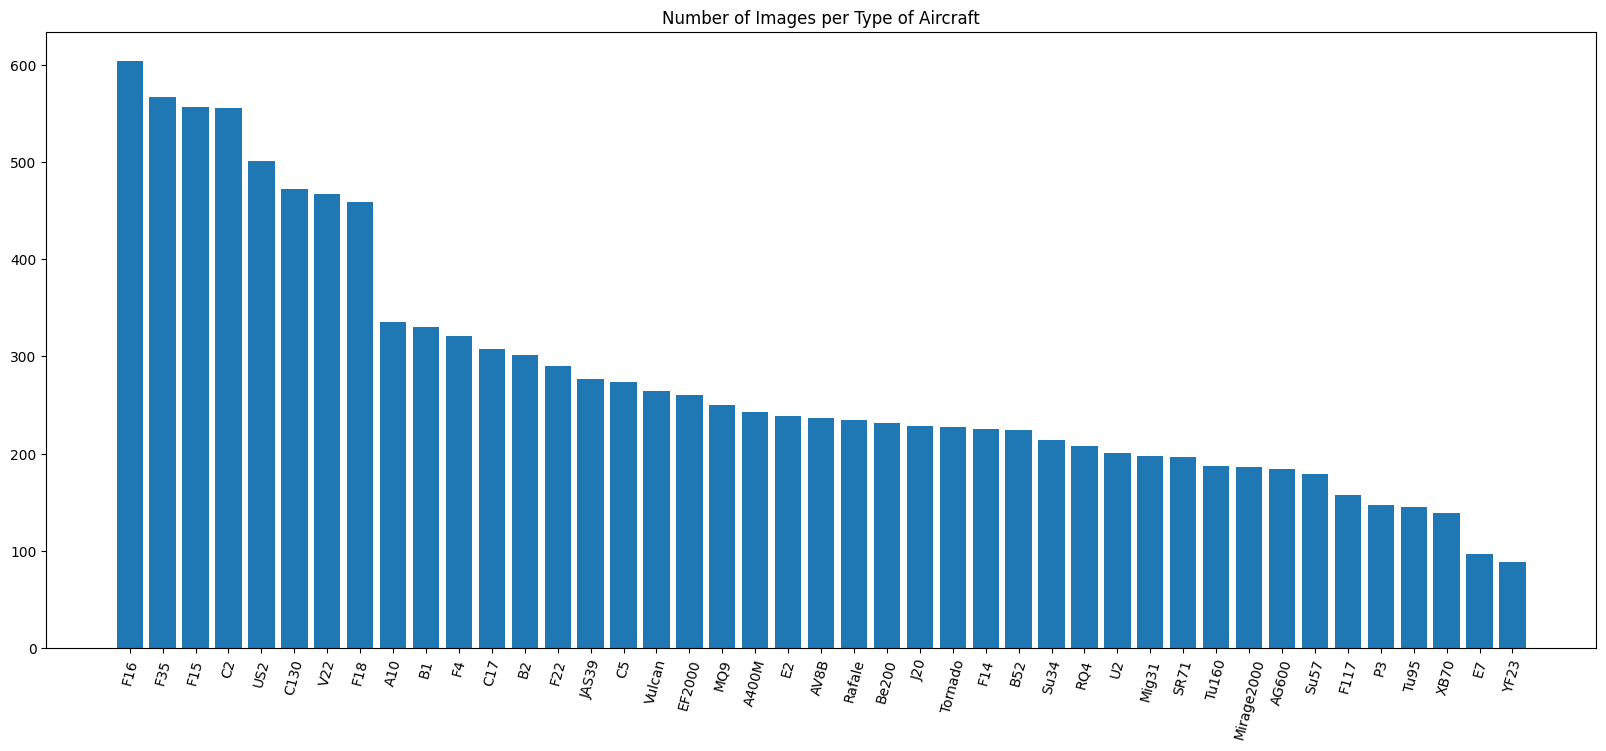

# Identifying Features

## Eurofighter Typhoon and Dassault Rafale - Comparison

Let's look at two similar aircraft - this is a Eurofighter Typhoon.

![Typhoon](data\crop\EF2000\93c26a9581f07a8ed09d10872312acd5_0.jpg)

And this is a Dassault Rafale (Air force version - the Rafale is also produced in a navalised version for carrier operations, the Rafale M)

![Rafale](data\crop\Rafale\be3c951fac43d60fb20b30206d8ca66c_2.jpg)

They are very similar, because they were born of the same program (which the French left midway through for reasons known only to the French)

![Comparison](Assets\Typhoon_Rafale_comparison.png)

1. Purple - This looks like an RWR receiver, the Rafale's is at the top of the vertical stabiliser, while the Typhoon has it at the bottom.

2. Blue - The petals on the afterburners of both jets are different, with the EJ200s on the Typhoon having a more distinctive "petal" look than the Snecma manufactured units on the Rafale.

3. Yellow - The Typhoon's fuselage is more distinctly tubular rather than blended into the wing structure like the Rafale. The Typhoon also has a low wing layout as opposed to the Rafale's mid wing layout.

4. Orange - Different canopy design with the Typhoon having a single bow as opposed to two on the Rafale.

5. Red - Different canard design. The Typhoon's canards are canted downwards as opposed to the Rafale's which are canted upwards.

6. Green - The Rafale's fuselage "flattens out" while the Typhoon's does not.

## F-14 Tomcat and F-15 Eagle - Comparison

The star of the film "Top Gun" (really, the people in that film were irrelevant)

![Comparison](data\crop\F14\7c63652b7f8b0b79909b96fcf6001344_0.jpg)

The F-15 Eagle (which for some reason, the Japanese painted in a Top Gun: Maverick theme)

![Comparison](data\crop\F15\2228c56016458b954d56d5c83f57d597_0.jpg)

## These aircraft are pretty distinct, but they were developed in the same era (first flight in the earlier 1970s) for the air superiority mission.

![Comparison](Assets\tomcat_eagle_comparison.png)

1. Purple - The Tomcat's twin vertical stabilisers are swept backwards while the Eagle's are not.

2. Blue - the Tomcat's engines are more widely spaced than the Eagle's. There is a fuel dump valve and speedbrake between the Tomcat's engines. The Tomcat in the image above is an F-14B or later with GE F110 engines, which have the afterburne petals, which are not present on any Eagle variants. The earlier F-14A also has exhaust nozzles which look slightly different, but distinct from the Eagle's bare nozzles.

3. Red - The Tomcat has variable geometry wings - from 20 degrees to 67 degrees of sweep angle. The Ealge has fixed geometry wings.

4. White - Tomcats in service always flew with a pair of 300 gal external tanks under the engines. These are the only hardpoints on the Tomcat which can mount external tanks. The Eagle can only mount external tanks on inboard wing stations and on the centreline.

5. Green - The leading edges of the Tomcat's wings extend to the intake, the Eagle's terminate somewhat further back.

6. Orange - The Eagle's M61 Vulcan rotary cannon is mounted in the right wing root. The Tomcat's is mounted in the left of the nose.

7. Yellow - The Tomcat has an integrated optical sensor (the Tactical Camera System - the F-14D has a slightly different chin-mounted Electro-Optical Targeting System but the bulge is still there). This is not present on the Eagle.

# The models should be able to pick out these differences.